Import Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Signal Parameters

In [44]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Duration of the signal (seconds)
N = int(fs * T)  # Number of samples (fs * T)

# Generate a random signal (time-domain)
time = np.linspace(0, T, N, endpoint=False)  # Time vector
random_signal = np.random.rand(N) - 0.5  # Random signal (centered around 0)
# Add a random sinusoidal component
freq_sin_1 = 25  # Frequency of the sinusoidal component (Hz)
freq_sin_2 = 60
amplitude_sin = 0.5  # Amplitude of the sinusoidal component
sinusoidal_component_1 = amplitude_sin * np.sin(2 * np.pi * freq_sin_1 * time)
sinusoidal_component_2 = amplitude_sin * np.sin(2 * np.pi * freq_sin_2 * time)

# Combine random signal and sinusoidal component
signal = random_signal + sinusoidal_component_1 + sinusoidal_component_2

# Perform FFT
fft_result = np.fft.fft(signal)  # Compute FFT
frequencies = np.fft.fftfreq(N, d=1/fs)  # Frequency bins

# Take the magnitude of the FFT result (only real part matters for amplitude)
magnitude = np.abs(fft_result) / N  # Normalize magnitude

# Only consider the positive frequencies (symmetric result for real signals)
positive_frequencies = frequencies[:N//2]
positive_magnitude = magnitude[:N//2]

Plotting Signal (Time domain and Frequency Domain)

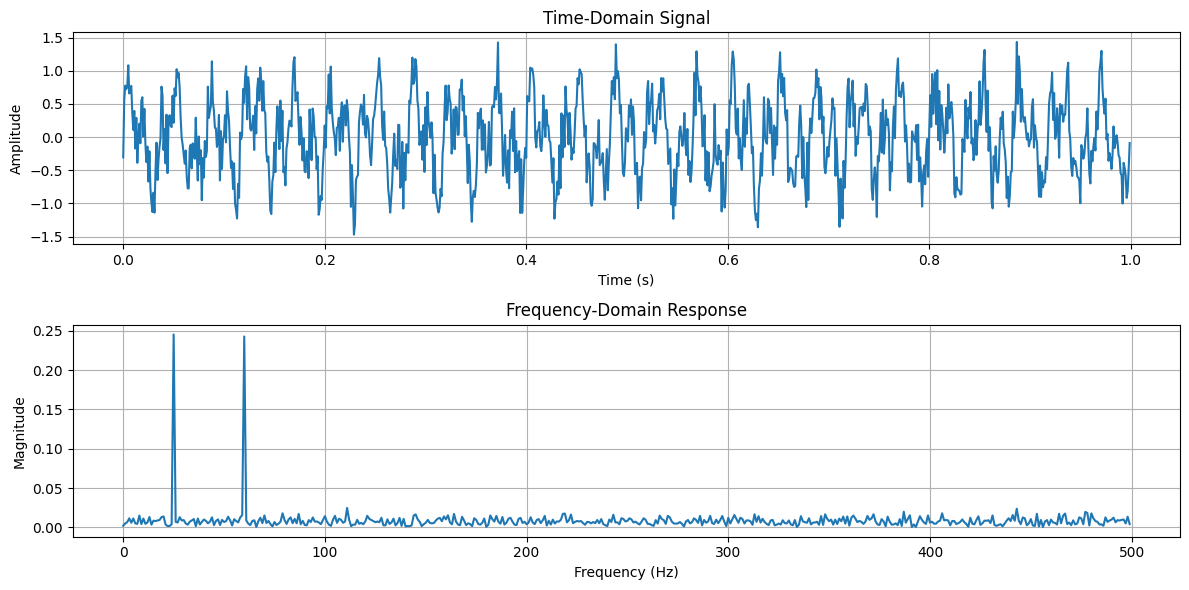

In [45]:
# Plot the time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Plot the frequency-domain response
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, positive_magnitude)
plt.title("Frequency-Domain Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

Band-Pass Filtering

In [46]:
# Apply a band-pass filter (e.g., 40 Hz to 60 Hz)
lower_bound = 48  # Lower cutoff frequency (Hz)
upper_bound = 52  # Upper cutoff frequency (Hz)

# Create a mask for the desired frequency range
band_pass_mask = (np.abs(frequencies) >= lower_bound) & (np.abs(frequencies) <= upper_bound)
filtered_fft_result = fft_result * band_pass_mask  # Apply the mask

# Perform Inverse FFT
filtered_signal = np.fft.ifft(filtered_fft_result).real  # Get the real part of the signal

Plotting Filtered Signal

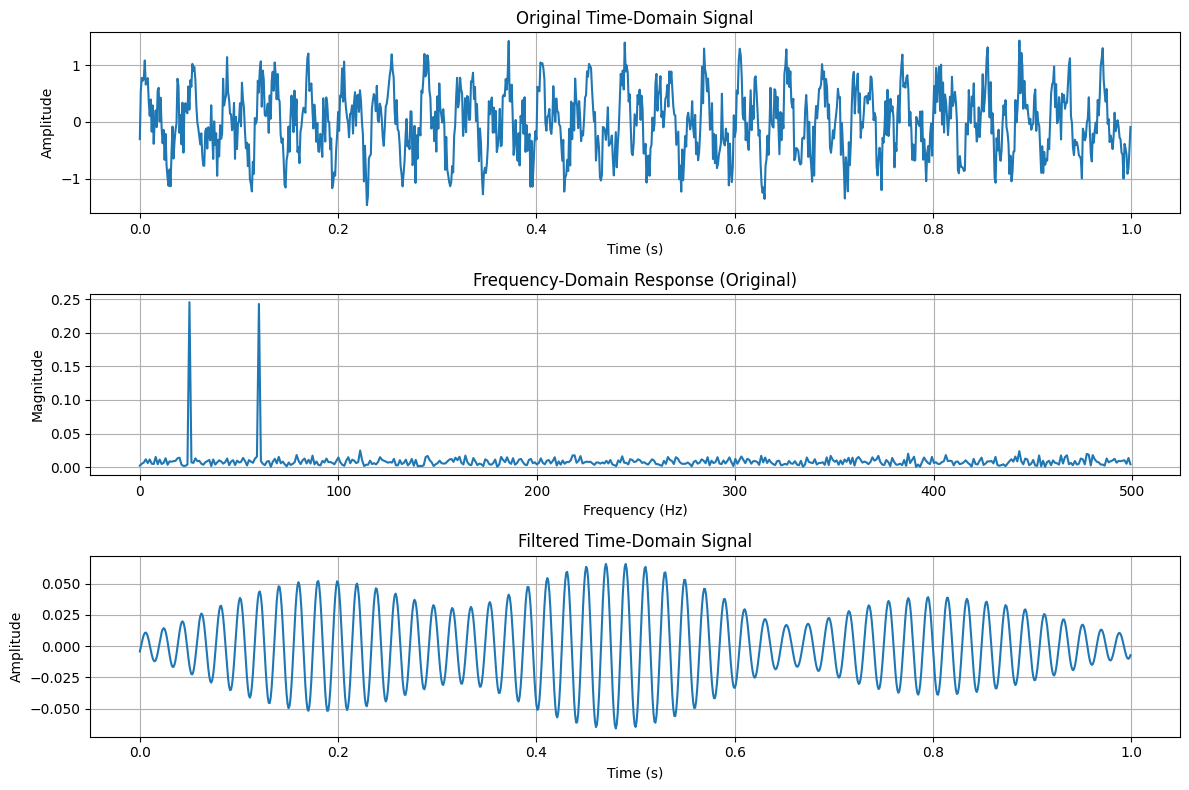

In [47]:
# Plot the original signal (time-domain)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title("Original Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Plot the frequency-domain response (magnitude spectrum)
magnitude = np.abs(fft_result) / N  # Normalize magnitude
plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], magnitude[:N//2])  # Only positive frequencies
plt.title("Frequency-Domain Response (Original)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

# Plot the filtered signal (time-domain)
plt.subplot(3, 1, 3)
plt.plot(time, filtered_signal)
plt.title("Filtered Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

Automating Filteration Process 

In [48]:
print(np.mean(magnitude[:N//2]))

0.00882852900198147


In [53]:
# Automatically detect peaks
peaks, _ = find_peaks(magnitude[:N//2], height=0.1)  # Detect peaks in positive frequencies
possible_frequencies = frequencies[peaks]  # Corresponding frequencies of the peaks

# Identify the strongest peak as the signal frequency
signal_frequency = possible_frequencies[np.argmax(magnitude[peaks])]
print(f"Detected signal frequency: {signal_frequency} Hz")
# print(len(possible_frequencies))

# Create a band-stop mask to remove frequencies except the detected signal frequency
bandwidth = 2  # Bandwidth around the signal frequency (Hz)
band_stop_mask = ~((np.abs(frequencies) >= (signal_frequency - bandwidth)) & (np.abs(frequencies) <= (signal_frequency + bandwidth)))

# Apply the mask to the FFT result
filtered_fft_result = fft_result * band_stop_mask

# Perform Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft_result).real  # Get the real part of the signal

Detected signal frequency: 25.0 Hz


Plotting Filtered Signal (After Automation)

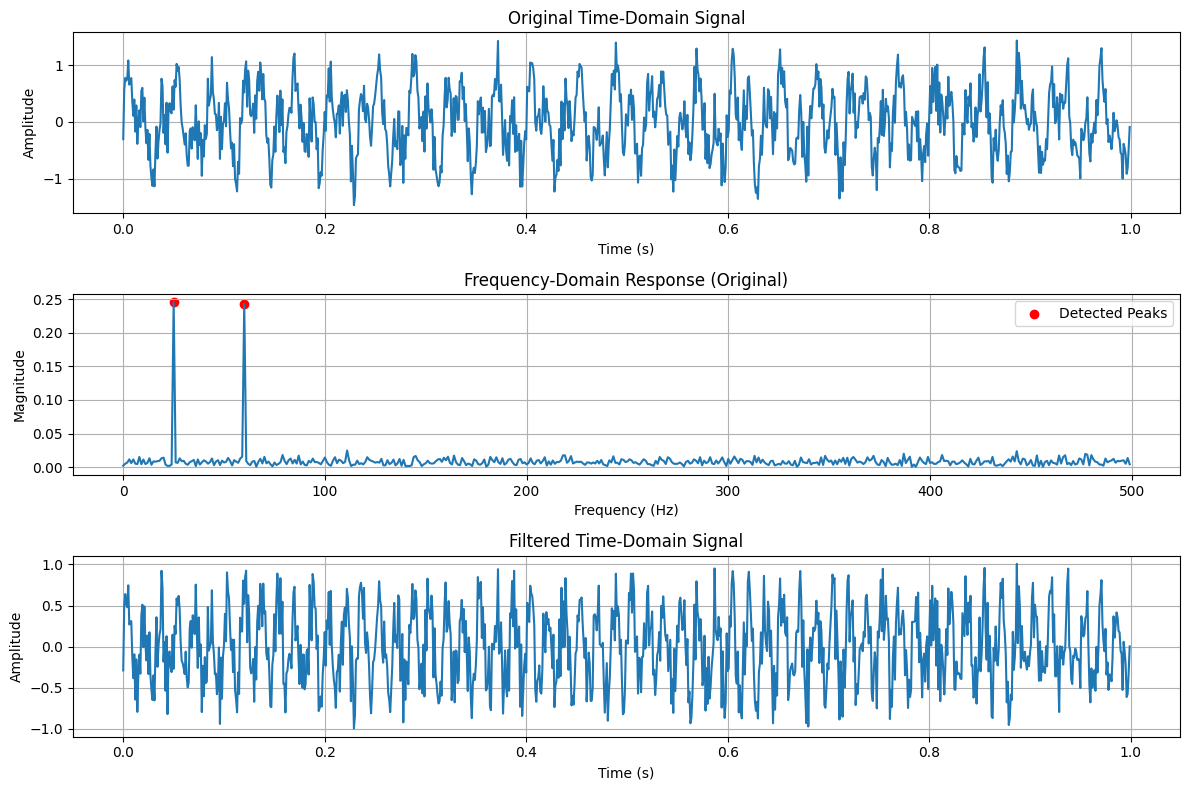

In [54]:
# Plot the results
plt.figure(figsize=(12, 8))

# Original time-domain signal
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title("Original Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain response
plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], magnitude[:N//2])  # Only positive frequencies
plt.scatter(frequencies[peaks], magnitude[peaks], color='red', label='Detected Peaks')  # Mark peaks
plt.title("Frequency-Domain Response (Original)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

# Filtered time-domain signal
plt.subplot(3, 1, 3)
plt.plot(time, filtered_signal)
plt.title("Filtered Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


Handling Multiple Peak signals

In [55]:
# Automatically detect peaks
peaks, _ = find_peaks(magnitude[:N//2], height=0.1)  # Detect peaks in positive frequencies
detected_frequencies = frequencies[peaks]  # Corresponding frequencies of the peaks
print(f"Detected signal frequencies: {detected_frequencies} Hz")

# Create a band-pass mask to preserve detected signal frequencies
bandwidth = 10  # Bandwidth around each detected frequency (Hz)
band_pass_mask = np.zeros_like(frequencies, dtype=bool)

for freq in detected_frequencies:
    band_pass_mask |= (np.abs(frequencies) >= (freq - bandwidth)) & (np.abs(frequencies) <= (freq + bandwidth))

# Apply the mask to the FFT result
filtered_fft_result = fft_result * band_pass_mask

# Perform Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft_result).real  # Get the real part of the signal

Detected signal frequencies: [25. 60.] Hz


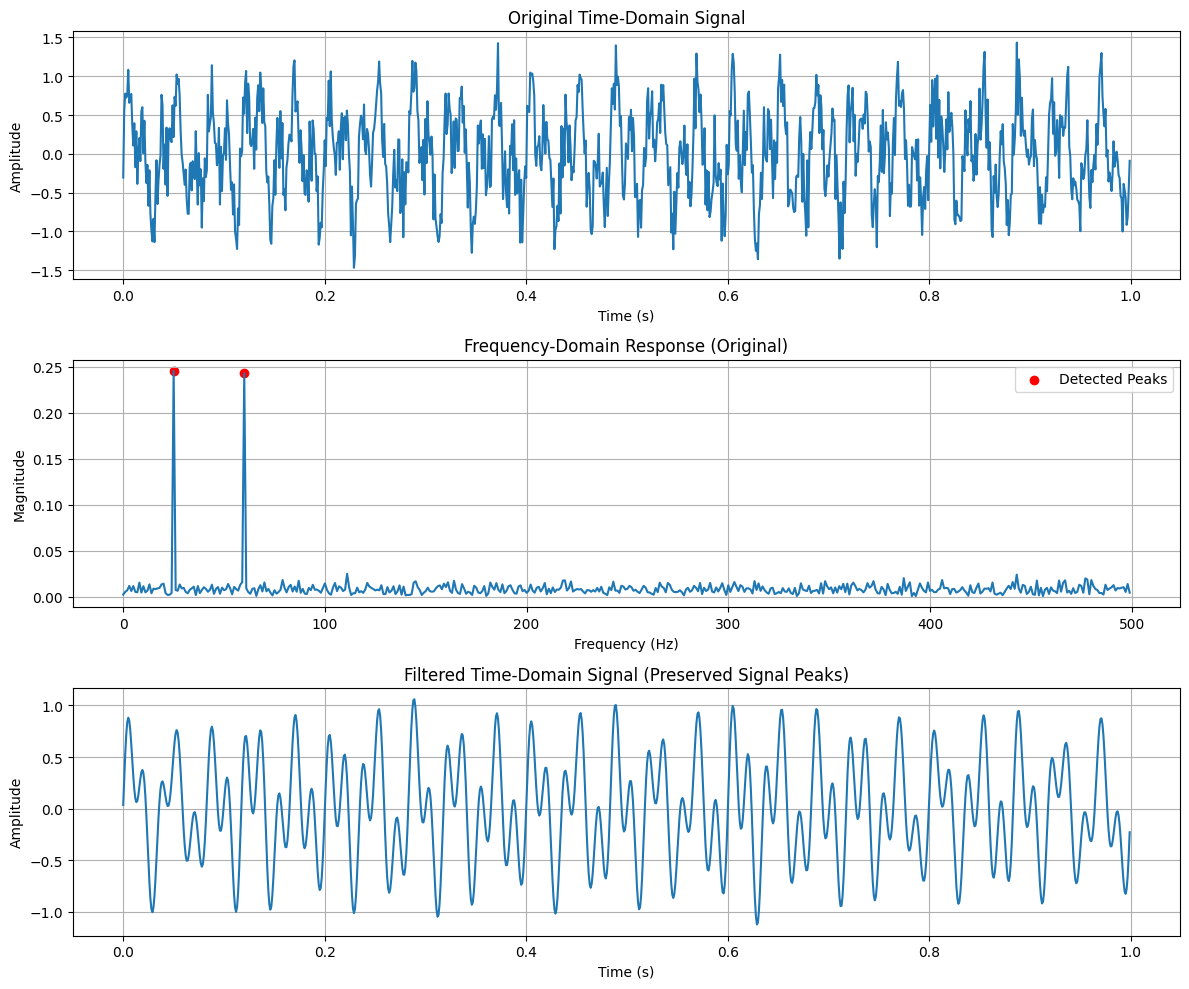

In [56]:
# Plot the results
plt.figure(figsize=(12, 10))

# Original time-domain signal
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title("Original Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain response
plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], magnitude[:N//2])  # Only positive frequencies
plt.scatter(frequencies[peaks], magnitude[peaks], color='red', label='Detected Peaks')  # Mark peaks
plt.title("Frequency-Domain Response (Original)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

# Filtered time-domain signal
plt.subplot(3, 1, 3)
plt.plot(time, filtered_signal)
plt.title("Filtered Time-Domain Signal (Preserved Signal Peaks)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()